## Import Statements

In [1]:
import pandas as pd
import numpy as np
import glob
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import metrics
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.feature_selection import RFE
sns.set()
import matplotlib
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import RandomUnderSampler
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.manifold import TSNE
from matplotlib.colors import LogNorm 

## Data Processing

### Add binary column with -1, 0, 1

In [8]:
# Change number in binary column to a -1 every other 10 seconds
def controlCol(data):
    
    binary = data['binary']
    for i in range(0, len(binary)):
        test = i % 20
        if 0 <= test and test < 10:
            binary.loc[i] = -1
    data.loc['binary'] = binary    

#     print (binary)
    return data

### Reads and concatenates data

In [138]:
# experiment type(vi, to, tv) 

sense1 = "to"
sense2 = "tv"
touch_type = "co"
path = r'C:\\Users\\Cleah\\Documents\\A Tactile\\Data\\'

#  Treats infinty values as NaN values
pd.set_option('use_inf_as_na', True)
# name of the data file
fileName = glob.glob(path + "*\\" + "*.csv")
# print(fileName[0])

totalRows = pd.DataFrame()
for i in range(0, len(fileName)):
    thisName = fileName[i]
    extype = thisName[-26] + thisName[-25]
    obtype = thisName[-19] + thisName[-18]
    print(obtype)
    if obtype == touch_type:
        if (extype == sense1 or extype == sense2):
            file = pd.read_csv(thisName)
            file['extype'] = extype
            file['participant'] = thisName[-16]
            file['binary'] = 1
            file = controlCol(file)
            totalRows = pd.concat([totalRows, file], axis = 0, ignore_index = True)

totalRows = totalRows.drop(totalRows.columns[21:-3], axis = 1)
totalRows = totalRows.drop(totalRows.columns[0:1], axis = 1)
# print(totalRows)
# Remove electrode AF7
totalRows = totalRows.drop(columns = ['Delta_AF7', 'Alpha_AF7', 'Gamma_AF7', 'Theta_AF7', 'Beta_AF7'], axis = 1)

# Data Processing
# deleting columns
# deleting rows
totalRows.dropna(
   axis = 0,
   how = 'any',
   thresh = None,
   subset = None, 
   inplace = True
 )
# totalRows = removeRows(totalRows)
data = totalRows
data = removeRows(data)
print(data)

dr
we
fi
sq
sq
co
ho
ro
sm
dr
we
fi
sq
co
ho
ro
sm
we
fi
sq
co
ho
sm
so
dr
we
fi
sq
co
ho
ro
sm
dr
we
fi
sq
co
ho
ro
sm
dr
we
fi
sq
co
ho
ro
sm
dr
we
fi
sq
co
ho
ro
sm
dr
ew
fi
sq
co


C:\Users\Cleah\anaconda3\envs\pt-project\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


ho
ro
ms
ed
we
fi
sq
co
ho
ro
sm
ed
we
fi
sq
co
ho
ro
sm
dr
we
fi
sq
co
ho
ro
sm
dr
we
fi
sq
co
ho
ro
sm
     Delta_TP9  Delta_AF8  Delta_TP10  Theta_TP9  Theta_AF8  Theta_TP10  \
5     0.677059   0.876303    0.854108   0.575702   0.153577    0.837218   
7     0.640613   0.771570    0.854108   0.557994   0.237928    0.837218   
9     0.556337   1.144795    0.854108   0.581921   0.338251    0.837218   
11    0.556337   1.742431    0.854108   0.581921   0.994503    0.837218   
12    0.556337   1.679954    0.854108   0.581921   1.067813    0.837218   
..         ...        ...         ...        ...        ...         ...   
818   0.749860   0.749651    0.834955   0.049436   0.334217    0.013887   
819   0.141529   0.754988   -0.157798   0.466435   0.351822    0.210239   
822   0.393585   0.453935    0.224950   0.510073   0.596231    0.272526   
823   0.527284   0.539507    0.165605   0.407017   0.537408   -0.372570   
825   0.585129   0.539929    0.300667   0.422905   0.576253   -0.26673

### Removes rows with 0 or -infinity

In [139]:
# This function removes rows with twenty zeros on them.
def removeRows(data):
    # Create a new DataFrame where each cell is True if zero and False otherwise
    zeros = data == 0
    # Create a new DataFrame where each row has a single cell containing number of zeros
    num_zeros = zeros.sum(axis = 1)  # Axis is 1 (rows = axis 0 and columns = axis 1) because we are producing sums of rows "along" axis 1
    
    # Create a new DataFrame where each row has a single cell that is True if there aren't 20 zeros and False otherwise
    keep_row = num_zeros != 15  # This creates a sort of "index" that tells us the indices of which rows to keep
    
    # Select the rows to keep from our input DataFrame (called df) using the indices of rows to keep that are stored in keep_row
    return data[keep_row]

## Data Preparation

In [140]:
# dataBin contains binary column without -1
dataBin = data[data['binary'] != -1]
dataOrig = dataBin
# Round to 2 places
dataBin = dataBin.round(2)
dataXY = dataBin.drop(columns = ['extype', 'participant', 'binary'])
# Convert dataframe for vision and touch-vision to numpy array

y_raw = dataBin['extype'].to_numpy()
y = np.zeros(len(y_raw))
for i in range(len(y_raw)):
    if y_raw[i] == sense1:
        y[i] = 1
# print(y)
# x = dataXY[dataBin['extype'] == sense1].to_numpy()
# y = dataXY[dataBin['extype'] == sense2].to_numpy()
x = dataXY.to_numpy()
print(x)
# print(dataBin['extype'])
# Normalize Data vision
scalerX = StandardScaler()
X = scalerX.fit_transform(x)
# Normalize Data touch-vision
# scalerY = StandardScaler()
# Y = scalerY.fit_transform(y)
# crop X
# X = X[0: len(Y)]
print(dataXY)

[[ 0.56  1.74  0.85 ...  1.49  0.25  0.7 ]
 [ 0.56  1.68  0.85 ...  1.49  0.2   0.7 ]
 [ 0.56  1.03  1.12 ...  1.49  0.1   0.68]
 ...
 [ 0.87 -0.12  0.98 ... -0.3   0.09  0.23]
 [ 0.53  0.54  0.17 ... -0.32  0.07  0.38]
 [ 0.59  0.54  0.3  ... -0.37 -0.02  0.39]]
     Delta_TP9  Delta_AF8  Delta_TP10  Theta_TP9  Theta_AF8  Theta_TP10  \
11        0.56       1.74        0.85       0.58       0.99        0.84   
12        0.56       1.68        0.85       0.58       1.07        0.84   
14        0.56       1.03        1.12       0.58       0.56        0.73   
15        1.31       1.25        1.15       1.24       0.65        0.86   
16        1.31       1.01        1.14       1.15       0.62        0.84   
..         ...        ...         ...        ...        ...         ...   
809       0.78       0.88        0.98       0.41       0.44        0.29   
810       0.33       0.56        0.35       0.22       0.38        0.34   
812       0.87      -0.12        0.98       0.44       0.16  

## Binary Classification

In [141]:
# Split data into 80% Training and 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
logReg2 = LogisticRegression(random_state = 0)
logReg2 = logReg2.fit(X_train, y_train)
y_pred = logReg2.predict(X_test)
# Model Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9285714285714286


#### Confusion Matrix + RFE

[[29  1]
 [ 3 23]]


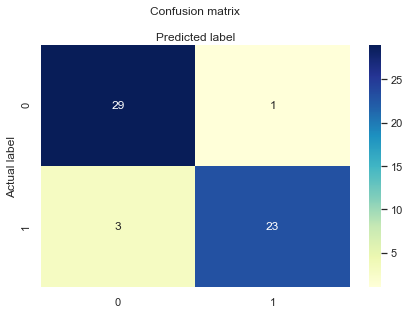

[False False False False  True False False False False False False False
 False  True False]
[ 7 11  6 13  1 12 14 10  3  5  2  9  4  1  8]


C:\Users\Cleah\anaconda3\envs\pt-project\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [142]:
# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu', fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
# Recursive Frequency Selection
rfe = RFE(logReg2, 2)
rfe = rfe.fit(X_train, y_train)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

## HeatMap

[[ 7. 12.  2.]
 [11. 14.  9.]
 [ 6. 10.  4.]
 [13.  3.  1.]
 [ 1.  5.  8.]]


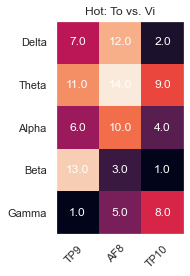

In [146]:
freqband = ["Delta", "Theta", "Alpha", "Beta", "Gamma"]
electrode = ["TP9", "AF8", "TP10"]
rfeRank = rfe.ranking_
rankMat = np.zeros((5,3))
# frequency band type
for i in np.arange(1, 6):
    # electrode
    for j in np.arange(1, 4): 
        
        rankMat[i - 1,j - 1] = rfeRank[5 * (j - 1) + i - 1]
print(rankMat)

fig, ax = plt.subplots()
im = ax.imshow(rankMat)

# We want to show all ticks...
ax.set_xticks(np.arange(len(electrode)))
ax.set_yticks(np.arange(len(freqband)))
# ... and label them with the respective list entries
ax.set_xticklabels(electrode)
ax.set_yticklabels(freqband)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation = 45, ha = "right",
         rotation_mode = "anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(freqband)):
    for j in range(len(electrode)):
        text = ax.text(j, i, rankMat[i, j],ha = "center", va = "center", color = "w")
        

ax.set_title("Hot: To vs. Vi")
fig.tight_layout()
plt.show()


In [147]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) < threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

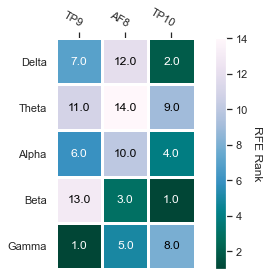

In [148]:
fig, ax = plt.subplots()

im, cbar = heatmap(rankMat, freqband, electrode, ax=ax,
                   cmap="PuBuGn_r", cbarlabel="RFE Rank")
texts = annotate_heatmap(im, valfmt="{x:.1f}")
plt.rcParams["axes.grid"] = False
fig.tight_layout()
plt.show()